In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [24]:
%store -r train
%store -r test
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice,TotalSF_log,TotalBath,BsmtTotalBath
0,1,60,RL,65.0,9.041922,Pave,NaN,Reg,Lvl,AllPub,...,NaN,2,2008,WD,Normal,208500,12.247694,7.444249,2.5,1.0
1,2,20,RL,80.0,9.169518,Pave,NaN,Reg,Lvl,AllPub,...,NaN,5,2007,WD,Normal,181500,12.109011,7.140453,2.0,0.5
2,3,60,RL,68.0,9.328123,Pave,NaN,IR1,Lvl,AllPub,...,NaN,9,2008,WD,Normal,223500,12.317167,7.487734,2.5,1.0
3,4,70,RL,60.0,9.164296,Pave,NaN,IR1,Lvl,AllPub,...,NaN,2,2006,WD,Abnorml,140000,11.849398,7.448334,1.0,1.0
4,5,60,RL,84.0,9.565214,Pave,NaN,IR1,Lvl,AllPub,...,NaN,12,2008,WD,Normal,250000,12.429216,7.695303,2.5,1.0


In [25]:
print(train.shape)
print(test.shape)

(1453, 71)
(1459, 69)


In [26]:
categorical_cols = train.select_dtypes(exclude=np.number)
print(categorical_cols.shape)
print(categorical_cols.describe())
print(categorical_cols.dtypes)

(1453, 46)
        MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
count         1453     1453   1453    91     1453        1453      1453   
unique          15        5      2     2        4           4         2   
top             20       RL   Pave  Grvl      Reg         Lvl    AllPub   
freq           533     1145   1448    50      922        1310      1452   

       LotConfig LandSlope Neighborhood  ... GarageQual GarageCond PavedDrive  \
count       1453      1453         1453  ...       1372       1372       1453   
unique         5         3           25  ...          5          5          3   
top       Inside       Gtl        NAmes  ...         TA         TA          Y   
freq        1046      1378          224  ...       1304       1319       1333   

       PoolQC  Fence MiscFeature MoSold YrSold SaleType SaleCondition  
count       6    281          53   1453   1453     1453          1453  
unique      3      4           4     12      5        9        

## MSSubClass

20     533
60     297
50     144
120     87
30      68
160     63
70      60
80      58
90      52
190     29
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
0
20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64
0


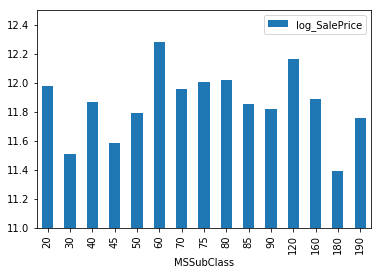

In [27]:
train.pivot_table(index='MSSubClass', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.MSSubClass.value_counts())
print(train.MSSubClass.isnull().sum())
print(test.MSSubClass.value_counts())
print(test.MSSubClass.isnull().sum())

In [28]:
def g(x):
 return 160 if x == 150 else x
test['MSSubClass'] = test['MSSubClass'].apply(g)
print(test.MSSubClass.value_counts())   
print(test.shape)

20     543
60     276
50     143
120     95
30      70
70      68
160     66
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
Name: MSSubClass, dtype: int64
(1459, 69)


In [29]:
train = pd.concat([train, pd.get_dummies(train.MSSubClass, drop_first = True)], axis=1)
train = train.drop('MSSubClass', axis=1)
print(train.shape)

(1453, 84)


In [30]:
test = pd.concat([test, pd.get_dummies(test.MSSubClass, drop_first = True)], axis=1)
test = test.drop('MSSubClass', axis=1)
print(test.shape)

(1459, 82)


## MSZoning

In [31]:
test['MSZoning'] = test['MSZoning'].fillna(value='RL')

RL         1145
RM          218
FV           65
RH           16
C (all)       9
Name: MSZoning, dtype: int64
0
RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64
0


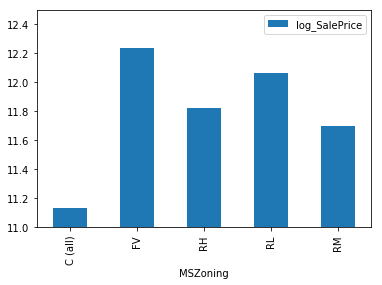

In [32]:
train.pivot_table(index='MSZoning', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.MSZoning.value_counts())
print(train.MSZoning.isnull().sum())
print(test.MSZoning.value_counts())
print(test.MSZoning.isnull().sum())

In [33]:
train = pd.concat([train, pd.get_dummies(train.MSZoning, drop_first = True)], axis=1)
train = train.drop('MSZoning', axis=1)
print(train.shape)


(1453, 87)


In [34]:
test = pd.concat([test, pd.get_dummies(test.MSZoning, drop_first = True)], axis=1)
test = test.drop('MSZoning', axis=1)
print(test.shape)

(1459, 85)


## Street

Pave    1448
Grvl       5
Name: Street, dtype: int64
0
Pave    1453
Grvl       6
Name: Street, dtype: int64
0


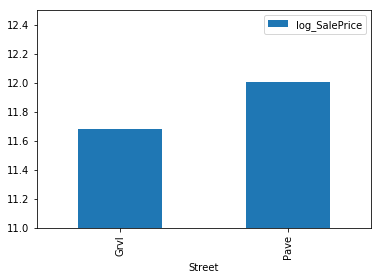

In [35]:
train.pivot_table(index='Street', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Street.value_counts())
print(train.Street.isnull().sum())
print(test.Street.value_counts())
print(test.Street.isnull().sum())

In [36]:
train = pd.concat([train, pd.get_dummies(train.Street, drop_first = True)], axis=1)
train = train.drop('Street', axis=1)
print(train.shape)

(1453, 87)


In [37]:
test = pd.concat([test, pd.get_dummies(test.Street, drop_first = True)], axis=1)
test = test.drop('Street', axis=1)
print(test.shape)

(1459, 85)


## Alley

Grvl    50
Pave    41
Name: Alley, dtype: int64
1362
Grvl    70
Pave    37
Name: Alley, dtype: int64
1352


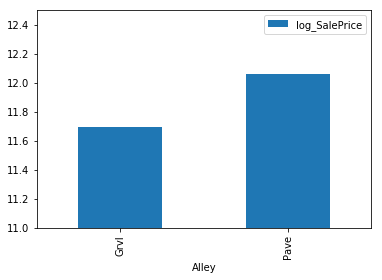

In [38]:
train.pivot_table(index='Alley', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Alley.value_counts())
print(train.Alley.isnull().sum())
print(test.Alley.value_counts())
print(test.Alley.isnull().sum())

In [39]:
train=train.drop('Alley', axis=1)
print(train.shape)

(1453, 86)


In [40]:
test=test.drop('Alley', axis=1)
print(test.shape)

(1459, 84)


## LotShape

Reg    922
IR1    483
IR2     40
IR3      8
Name: LotShape, dtype: int64
0
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64
0


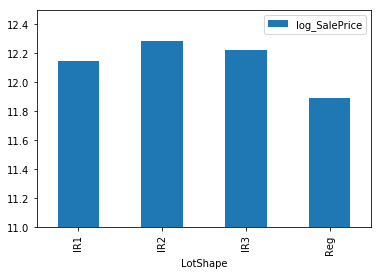

In [41]:
train.pivot_table(index='LotShape', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.LotShape.value_counts())
print(train.LotShape.isnull().sum())
print(test.LotShape.value_counts())
print(test.LotShape.isnull().sum())

In [42]:
#Reducing to binary Regular vs Irregular
def f(x):
 return 1 if x == 'Reg' else 0
train['LotShape'] = train['LotShape'].apply(f)
print(train.LotShape.value_counts())   
print(train.shape)

1    922
0    531
Name: LotShape, dtype: int64
(1453, 86)


In [43]:
def g(x):
 return 1 if x == 'Reg' else 0
test['LotShape'] = test['LotShape'].apply(g)
print(test.LotShape.value_counts())   
print(test.shape)

1    934
0    525
Name: LotShape, dtype: int64
(1459, 84)


## LandContour

Lvl    1310
Bnk      61
HLS      49
Low      33
Name: LandContour, dtype: int64
0
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64
0


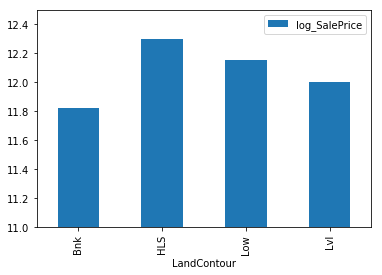

In [44]:
train.pivot_table(index='LandContour', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.LandContour.value_counts())
print(train.LandContour.isnull().sum())
print(test.LandContour.value_counts())
print(test.LandContour.isnull().sum())

In [45]:
train = pd.concat([train, pd.get_dummies(train.LandContour, drop_first = True)], axis=1)
train = train.drop('LandContour', axis=1)
print(train.shape)

(1453, 88)


In [46]:
test = pd.concat([test, pd.get_dummies(test.LandContour, drop_first = True)], axis=1)
test = test.drop('LandContour', axis=1)
print(test.shape)

(1459, 86)


## Utilities

AllPub    1452
NoSeWa       1
Name: Utilities, dtype: int64
0


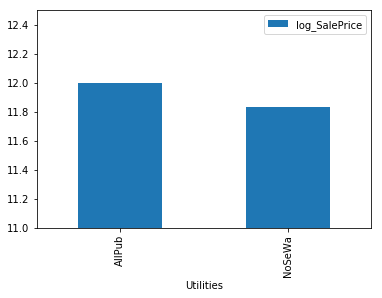

In [47]:
train.pivot_table(index='Utilities', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Utilities.value_counts())
print(train.Utilities.isnull().sum())

In [48]:
# dropping utilities

In [49]:
train = train.drop('Utilities', axis=1)
print(train.shape)

(1453, 87)


In [50]:
test = test.drop('Utilities', axis=1)
print(test.shape)

(1459, 85)


## LotConfig

Inside     1046
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
0
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64
0


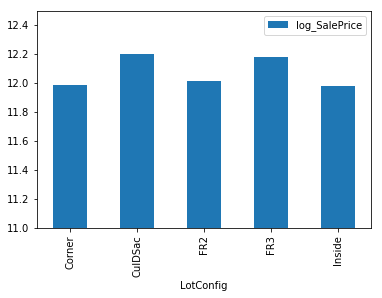

In [51]:
train.pivot_table(index='LotConfig', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.LotConfig.value_counts())
print(train.LotConfig.isnull().sum())
print(test.LotConfig.value_counts())
print(test.LotConfig.isnull().sum())

In [52]:
train = pd.concat([train, pd.get_dummies(train.LotConfig, drop_first = True)], axis=1)
train = train.drop('LotConfig', axis=1)
print(train.shape)

(1453, 90)


In [53]:
test = pd.concat([test, pd.get_dummies(test.LotConfig, drop_first = True)], axis=1)
test = test.drop('LotConfig', axis=1)
print(test.shape)

(1459, 88)


## LandSlope

Gtl    1378
Mod      63
Sev      12
Name: LandSlope, dtype: int64
0
Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64
0


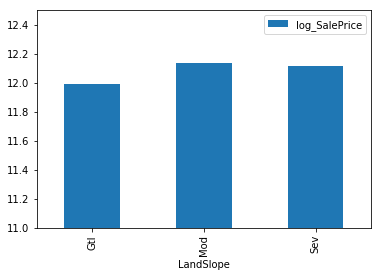

In [54]:
train.pivot_table(index='LandSlope', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.LandSlope.value_counts())
print(train.LandSlope.isnull().sum())
print(test.LandSlope.value_counts())
print(test.LandSlope.isnull().sum())

In [55]:
train = pd.concat([train, pd.get_dummies(train.LandSlope, drop_first = True)], axis=1)
train = train.drop('LandSlope', axis=1)
print(train.shape)


(1453, 91)


In [56]:
test = pd.concat([test, pd.get_dummies(test.LandSlope, drop_first = True)], axis=1)
test = test.drop('LandSlope', axis=1)
print(test.shape)

(1459, 89)


## Neighborhood

NAmes      224
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     48
NoRidge     41
Timber      37
IDOTRR      36
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
0
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64
0


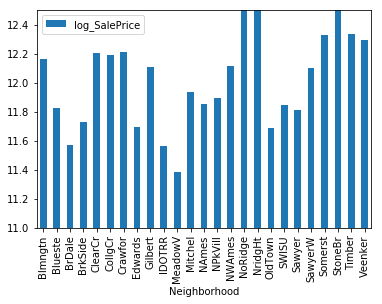

In [57]:
train.pivot_table(index='Neighborhood', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Neighborhood.value_counts())
print(train.Neighborhood.isnull().sum())
print(test.Neighborhood.value_counts())
print(test.Neighborhood.isnull().sum())

In [58]:
train = pd.concat([train, pd.get_dummies(train.Neighborhood, drop_first = True)], axis=1)
train = train.drop('Neighborhood', axis=1)
print(train.shape)

(1453, 114)


In [59]:
test = pd.concat([test, pd.get_dummies(test.Neighborhood, drop_first = True)], axis=1)
test = test.drop('Neighborhood', axis=1)
print(test.shape)

(1459, 112)


## Condition1

Norm      1256
Feedr       80
Artery      48
RRAn        26
PosN        18
RRAe        11
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
0
Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNn         4
RRNe         4
Name: Condition1, dtype: int64
0


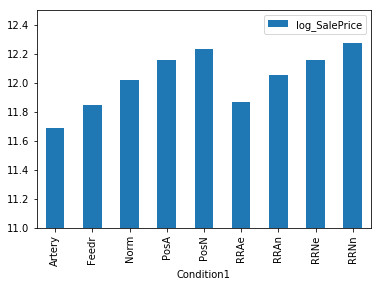

In [60]:
train.pivot_table(index='Condition1', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Condition1.value_counts())
print(train.Condition1.isnull().sum())
print(test.Condition1.value_counts())
print(test.Condition1.isnull().sum())

In [61]:
train = pd.concat([train, pd.get_dummies(train.Condition1, drop_first = True)], axis=1)
train = train.drop('Condition1', axis=1)
print(train.shape)

(1453, 121)


In [62]:
test = pd.concat([test, pd.get_dummies(test.Condition1, drop_first = True)], axis=1)
test = test.drop('Condition1', axis=1)
print(test.shape)

(1459, 119)


## Condition2

In [63]:
#dropping condition 2, 99% norm
train=train.drop('Condition2', axis=1)
print(train.shape)

(1453, 120)


In [64]:
test=test.drop('Condition2', axis=1)
print(test.shape)

(1459, 118)


## BldgType

1Fam      1214
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      30
Name: BldgType, dtype: int64
0
1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64
0


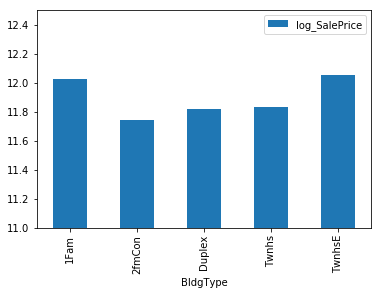

In [65]:
train.pivot_table(index='BldgType', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.BldgType.value_counts())
print(train.BldgType.isnull().sum())
print(test.BldgType.value_counts())
print(test.BldgType.isnull().sum())

In [66]:
train = pd.concat([train, pd.get_dummies(train.BldgType, drop_first = True)], axis=1)
train = train.drop('BldgType', axis=1)
print(train.shape)

(1453, 123)


In [67]:
test = pd.concat([test, pd.get_dummies(test.BldgType, drop_first = True)], axis=1)
test = test.drop('BldgType', axis=1)
print(test.shape)

(1459, 121)


## HouseStyle

1Story    721
2Story    443
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
0
1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64
0


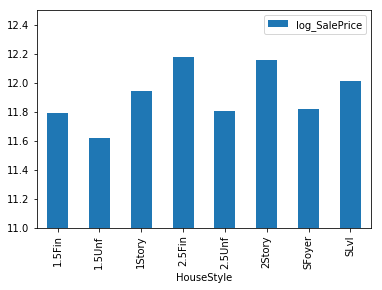

In [68]:
train.pivot_table(index='HouseStyle', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.HouseStyle.value_counts())
print(train.HouseStyle.isnull().sum())
print(test.HouseStyle.value_counts())
print(test.HouseStyle.isnull().sum())

In [69]:
def f(x):
 return '2Story' if x == '2.5Fin' else x
train['HouseStyle'] = train['HouseStyle'].apply(f)
print(train.HouseStyle.value_counts())   
print(train.shape)

1Story    721
2Story    451
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
Name: HouseStyle, dtype: int64
(1453, 123)


In [70]:
train = pd.concat([train, pd.get_dummies(train.HouseStyle, drop_first = True)], axis=1)
train = train.drop('HouseStyle', axis=1)
print(train.shape)

(1453, 128)


In [71]:
test = pd.concat([test, pd.get_dummies(test.HouseStyle, drop_first = True)], axis=1)
test = test.drop('HouseStyle', axis=1)
print(test.shape)

(1459, 126)


## RoofStyle

Gable      1139
Hip         282
Flat         12
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
0
Gable      1169
Hip         265
Gambrel      11
Flat          7
Mansard       4
Shed          3
Name: RoofStyle, dtype: int64
0


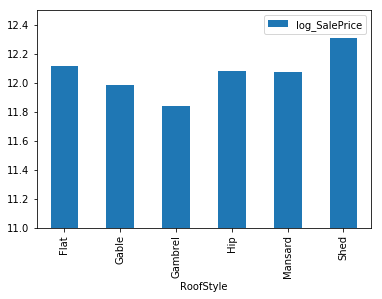

In [72]:
train.pivot_table(index='RoofStyle', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.RoofStyle.value_counts())
print(train.RoofStyle.isnull().sum())
print(test.RoofStyle.value_counts())
print(test.RoofStyle.isnull().sum())

In [73]:
train = pd.concat([train, pd.get_dummies(train.RoofStyle, drop_first = True)], axis=1)
train = train.drop('RoofStyle', axis=1)
print(train.shape)

(1453, 132)


In [74]:
test = pd.concat([test, pd.get_dummies(test.RoofStyle, drop_first = True)], axis=1)
test = test.drop('RoofStyle', axis=1)
print(test.shape)

(1459, 130)


## RoofMatl

In [75]:
#drop RoofMatl
train = train.drop('RoofMatl', axis = 1)
print(train.shape)

(1453, 131)


In [76]:
test = test.drop('RoofMatl', axis = 1)
print(test.shape)

(1459, 129)


## Exterior1st

VinylSd    514
HdBoard    222
MetalSd    218
Wd Sdng    205
Plywood    108
CemntBd     60
BrkFace     49
WdShing     26
Stucco      24
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64
0
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64
1


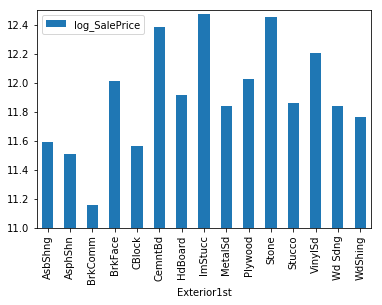

In [77]:
train.pivot_table(index='Exterior1st', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Exterior1st.value_counts())
print(train.Exterior1st.isnull().sum())
print(test.Exterior1st.value_counts())
print(test.Exterior1st.isnull().sum())

In [78]:
def f(x):
 return 'Other' if x in ['WdShing','Stucco', 'AsbShng', 'BrkComm', 'Stone', 'AsphShn', 'CBlock', 'ImStucc'] else x
train['Exterior1st'] = train['Exterior1st'].apply(f)
print(train.Exterior1st.value_counts())   

VinylSd    514
HdBoard    222
MetalSd    218
Wd Sdng    205
Plywood    108
Other       77
CemntBd     60
BrkFace     49
Name: Exterior1st, dtype: int64


In [79]:
def g(x):
 return 'Other' if x in ['WdShing','Stucco', 'AsbShng', 'BrkComm', 'Stone', 'AsphShn', 'CBlock', 'ImStucc'] else x
test['Exterior1st'] = test['Exterior1st'].apply(g).fillna(value='VinylSd')
print(test.Exterior1st.value_counts())   

VinylSd    511
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
Other       78
CemntBd     65
BrkFace     37
Name: Exterior1st, dtype: int64


In [80]:
train = pd.concat([train, pd.get_dummies(train.Exterior1st, drop_first = True)], axis=1)
train = train.drop('Exterior1st', axis=1)
print(train.shape)

(1453, 137)


In [81]:
test = pd.concat([test, pd.get_dummies(test.Exterior1st, drop_first = True)], axis=1)
test = test.drop('Exterior1st', axis=1)
print(test.shape)

(1459, 135)


## Exterior2nd

In [82]:
#drop 
train=train.drop('Exterior2nd', axis=1)
print(train.shape)

(1453, 136)


In [83]:
test=test.drop('Exterior2nd', axis=1)
print(test.shape)

(1459, 134)


## MasVnrType

In [84]:
train['MasVnrType'] = train['MasVnrType'].fillna(value=train.mode()['MasVnrType'][0])

In [85]:
test['MasVnrType'] = test['MasVnrType'].fillna(value=test.mode()['MasVnrType'][0])

None       869
BrkFace    444
Stone      125
BrkCmn      15
Name: MasVnrType, dtype: int64
0
None       869
BrkFace    444
Stone      125
BrkCmn      15
Name: MasVnrType, dtype: int64
0


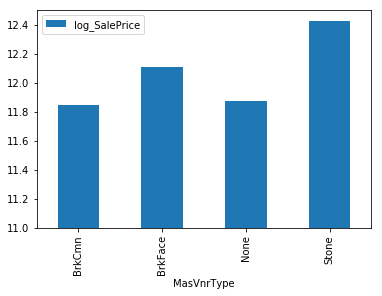

In [86]:
train.pivot_table(index='MasVnrType', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.MasVnrType.value_counts())
print(train.MasVnrType.isnull().sum())
print(train.MasVnrType.value_counts())
print(train.MasVnrType.isnull().sum())

In [87]:
train = pd.concat([train, pd.get_dummies(train.MasVnrType, drop_first = True)], axis=1)
train = train.drop('MasVnrType', axis=1)
print(train.shape)

(1453, 138)


In [88]:
test = pd.concat([test, pd.get_dummies(test.MasVnrType, drop_first = True)], axis=1)
test = test.drop('MasVnrType', axis=1)
print(test.shape)

(1459, 136)


## ExterQual

TA    903
Gd    488
Ex     49
Fa     13
Name: ExterQual, dtype: int64
0
TA    892
Gd    491
Ex     55
Fa     21
Name: ExterQual, dtype: int64
0


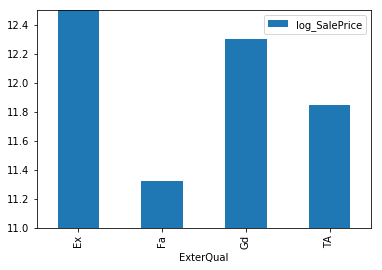

In [89]:
train.pivot_table(index='ExterQual', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.ExterQual.value_counts())
print(train.ExterQual.isnull().sum())
print(test.ExterQual.value_counts())
print(test.ExterQual.isnull().sum())

In [90]:
train = pd.concat([train, pd.get_dummies(train.ExterQual, drop_first = True)], axis=1)
train = train.drop('ExterQual', axis=1)
print(train.shape)

(1453, 140)


In [91]:
test = pd.concat([test, pd.get_dummies(test.ExterQual, drop_first = True)], axis=1)
test = test.drop('ExterQual', axis=1)
print(test.shape)

(1459, 138)


## ExterCond

TA    1276
Gd     145
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
0
TA    1256
Gd     153
Fa      39
Ex       9
Po       2
Name: ExterCond, dtype: int64
0


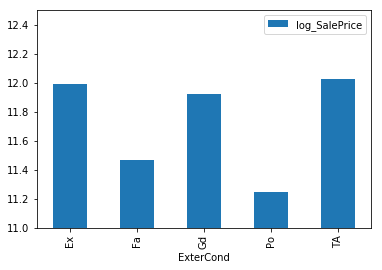

In [92]:
train.pivot_table(index='ExterCond', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.ExterCond.value_counts())
print(train.ExterCond.isnull().sum())
print(test.ExterCond.value_counts())
print(test.ExterCond.isnull().sum())

In [93]:
train = pd.concat([train, pd.get_dummies(train.ExterCond, drop_first = True)], axis=1)
train = train.drop('ExterCond', axis=1)
print(train.shape)

(1453, 143)


In [94]:
test = pd.concat([test, pd.get_dummies(test.ExterCond, drop_first = True)], axis=1)
test = test.drop('ExterCond', axis=1)
print(test.shape)

(1459, 141)


## Foundation

PConc     644
CBlock    630
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
0
PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
Name: Foundation, dtype: int64
0


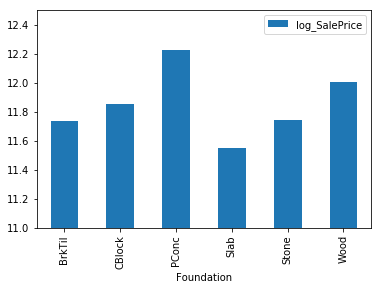

In [95]:
train.pivot_table(index='Foundation', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Foundation.value_counts())
print(train.Foundation.isnull().sum())
print(test.Foundation.value_counts())
print(test.Foundation.isnull().sum())

In [96]:
train = pd.concat([train, pd.get_dummies(train.Foundation, drop_first = True)], axis=1)
train = train.drop('Foundation', axis=1)
print(train.shape)

(1453, 147)


In [97]:
test = pd.concat([test, pd.get_dummies(test.Foundation, drop_first = True)], axis=1)
test = test.drop('Foundation', axis=1)
print(test.shape)

(1459, 145)


## BsmtQual

In [98]:
train['BsmtQual'] = train['BsmtQual'].fillna(value='None')

In [99]:
test['BsmtQual'] = test['BsmtQual'].fillna(value='None')

TA      647
Gd      616
Ex      118
None     37
Fa       35
Name: BsmtQual, dtype: int64
0
TA      647
Gd      616
Ex      118
None     37
Fa       35
Name: BsmtQual, dtype: int64
0


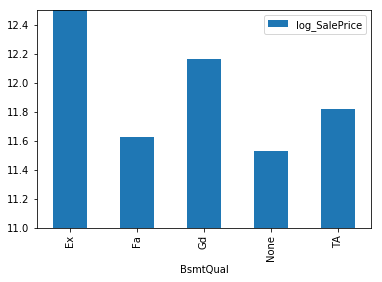

In [100]:
train.pivot_table(index='BsmtQual', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.BsmtQual.value_counts())
print(train.BsmtQual.isnull().sum())
print(train.BsmtQual.value_counts())
print(train.BsmtQual.isnull().sum())

In [101]:
train = pd.concat([train, pd.get_dummies(train.BsmtQual, drop_first = True)], axis=1)
train = train.drop('BsmtQual', axis=1)
print(train.shape)

(1453, 150)


In [102]:
test = pd.concat([test, pd.get_dummies(test.BsmtQual, drop_first = True)], axis=1)
test = test.drop('BsmtQual', axis=1)
print(test.shape)

(1459, 148)


## BsmtCond

In [103]:
train['BsmtCond'] = train['BsmtCond'].fillna(value='None')
test['BsmtCond'] = test['BsmtCond'].fillna(value='None')

TA      1304
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64
0
TA      1304
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64
0


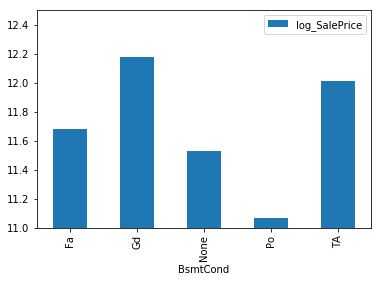

In [104]:
train.pivot_table(index='BsmtCond', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.BsmtCond.value_counts())
print(train.BsmtCond.isnull().sum())
print(train.BsmtCond.value_counts())
print(train.BsmtCond.isnull().sum())

In [105]:
train = pd.concat([train, pd.get_dummies(train.BsmtCond, drop_first = True)], axis=1)
train = train.drop('BsmtCond', axis=1)
print(train.shape)

(1453, 153)


In [106]:
test = pd.concat([test, pd.get_dummies(test.BsmtCond, drop_first = True)], axis=1)
test = test.drop('BsmtCond', axis=1)
print(test.shape)

(1459, 151)


## BsmtExposure

In [107]:
train['BsmtExposure'] = train['BsmtExposure'].fillna(value='None')
test['BsmtExposure'] = test['BsmtExposure'].fillna(value='None')

No      951
Av      220
Gd      130
Mn      114
None     38
Name: BsmtExposure, dtype: int64
0
No      951
Av      197
Gd      142
Mn      125
None     44
Name: BsmtExposure, dtype: int64
0


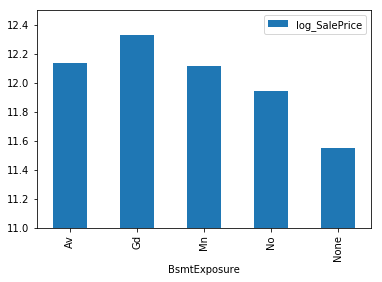

In [108]:
train.pivot_table(index='BsmtExposure', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.BsmtExposure.value_counts())
print(train.BsmtExposure.isnull().sum())
print(test.BsmtExposure.value_counts())
print(test.BsmtExposure.isnull().sum())

In [109]:
train = pd.concat([train, pd.get_dummies(train.BsmtExposure, drop_first = True)], axis=1)
train = train.drop('BsmtExposure', axis=1)
print(train.shape)

(1453, 156)


In [110]:
test = pd.concat([test, pd.get_dummies(test.BsmtExposure, drop_first = True)], axis=1)
test = test.drop('BsmtExposure', axis=1)
print(test.shape)

(1459, 154)


## BsmtFinType1

In [111]:
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(value='None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(value='None')

Unf     428
GLQ     415
ALQ     219
BLQ     147
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64
0
GLQ     431
Unf     421
ALQ     209
Rec     155
BLQ     121
LwQ      80
None     42
Name: BsmtFinType1, dtype: int64
0


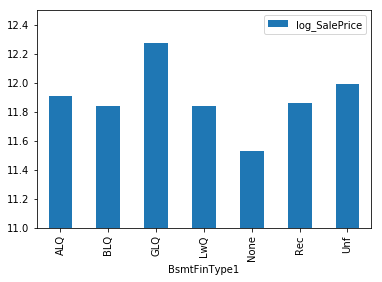

In [112]:
train.pivot_table(index='BsmtFinType1', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.BsmtFinType1.value_counts())
print(train.BsmtFinType1.isnull().sum())
print(test.BsmtFinType1.value_counts())
print(test.BsmtFinType1.isnull().sum())

In [113]:
train = pd.concat([train, pd.get_dummies(train.BsmtFinType1, drop_first = True)], axis=1)
train = train.drop('BsmtFinType1', axis=1)
print(train.shape)

(1453, 161)


In [114]:
test = pd.concat([test, pd.get_dummies(test.BsmtFinType1, drop_first = True)], axis=1)
test = test.drop('BsmtFinType1', axis=1)
print(test.shape)

(1459, 159)


## BsmtFinType2

In [115]:
train = train.drop('BsmtFinType2', axis=1)
train.shape

(1453, 160)

In [116]:
test = test.drop('BsmtFinType2', axis=1)
test.shape

(1459, 158)

## Heating

In [117]:
# Drop Heating
train = train.drop('Heating', axis=1)
print(train.shape)

(1453, 159)


In [118]:
test = test.drop('Heating', axis=1)
print(test.shape)

(1459, 157)


## HeatingQC

Ex    736
TA    426
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
0
Ex    752
TA    429
Gd    233
Fa     43
Po      2
Name: HeatingQC, dtype: int64
0


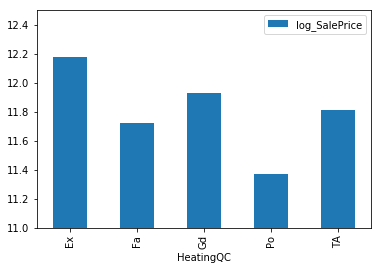

In [119]:
train.pivot_table(index='HeatingQC', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.HeatingQC.value_counts())
print(train.HeatingQC.isnull().sum())
print(test.HeatingQC.value_counts())
print(test.HeatingQC.isnull().sum())

In [120]:
train = pd.concat([train, pd.get_dummies(train.HeatingQC, drop_first = True)], axis=1)
train = train.drop('HeatingQC', axis=1)
print(train.shape)

(1453, 162)


In [121]:
test = pd.concat([test, pd.get_dummies(test.HeatingQC, drop_first = True)], axis=1)
test = test.drop('HeatingQC', axis=1)
print(test.shape)

(1459, 160)


## CentralAir

Y    1358
N      95
Name: CentralAir, dtype: int64
0
Y    1358
N     101
Name: CentralAir, dtype: int64
0


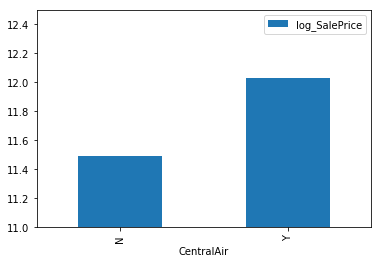

In [122]:
train.pivot_table(index='CentralAir', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.CentralAir.value_counts())
print(train.CentralAir.isnull().sum())
print(test.CentralAir.value_counts())
print(test.CentralAir.isnull().sum())

In [123]:
def f(x):
 return 1 if x == 'Y' else 0
train['CentralAir'] = train['CentralAir'].apply(f)
print(train.CentralAir.value_counts())  
print(train.shape)

1    1358
0      95
Name: CentralAir, dtype: int64
(1453, 162)


In [124]:
def g(x):
 return 1 if x == 'Y' else 0
test['CentralAir'] = test['CentralAir'].apply(g)
print(test.CentralAir.value_counts())
print(test.shape)

1    1358
0     101
Name: CentralAir, dtype: int64
(1459, 160)


## Electrical

SBrkr    1327
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
1
SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64
0


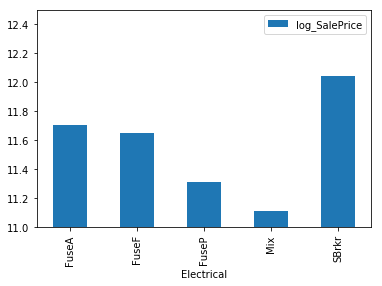

In [125]:
train.pivot_table(index='Electrical', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Electrical.value_counts())
print(train.Electrical.isnull().sum())
print(test.Electrical.value_counts())
print(test.Electrical.isnull().sum())

In [126]:
def f(x):
 return 1 if x == 'SBrkr' else 0
train['Electrical'] = train['Electrical'].apply(f)
print(train.Electrical.value_counts())   
print(train.shape)

1    1327
0     126
Name: Electrical, dtype: int64
(1453, 162)


In [127]:
def g(x):
 return 1 if x == 'SBrkr' else 0
test['Electrical'] = test['Electrical'].apply(g)
print(test.Electrical.value_counts())   
print(test.shape)

1    1337
0     122
Name: Electrical, dtype: int64
(1459, 160)


## KitchenQual

TA    732
Gd    585
Ex     97
Fa     39
Name: KitchenQual, dtype: int64
0
TA    732
Gd    585
Ex     97
Fa     39
Name: KitchenQual, dtype: int64
0


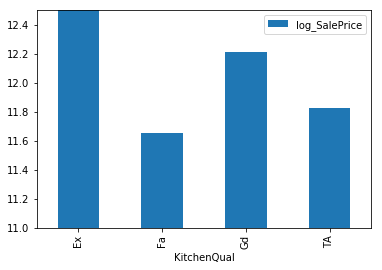

In [128]:
train.pivot_table(index='KitchenQual', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.KitchenQual.value_counts())
print(train.KitchenQual.isnull().sum())
print(train.KitchenQual.value_counts())
print(train.KitchenQual.isnull().sum())

In [129]:
train = pd.concat([train, pd.get_dummies(train.KitchenQual, drop_first = True)], axis=1)
train = train.drop('KitchenQual', axis=1)
print(train.shape)

(1453, 164)


In [130]:
test = pd.concat([test, pd.get_dummies(test.KitchenQual, drop_first = True)], axis=1)
test = test.drop('KitchenQual', axis=1)
print(test.shape)

(1459, 162)


## Functional

Typ     1353
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
0
Typ     1353
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
0


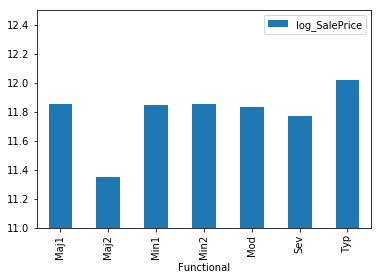

In [131]:
train.pivot_table(index='Functional', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Functional.value_counts())
print(train.Functional.isnull().sum())
print(train.Functional.value_counts())
print(train.Functional.isnull().sum())

In [132]:
def f(x):
 return 1 if x == 'Typ' else 0
train['Functional'] = train['Functional'].apply(f)
print(train.Functional.value_counts())   
print(train.shape)

1    1353
0     100
Name: Functional, dtype: int64
(1453, 164)


In [133]:
def g(x):
 return 1 if x == 'Typ' else 0
test['Functional'] = test['Functional'].apply(g)
print(test.Functional.value_counts())   
print(test.shape)

1    1357
0     102
Name: Functional, dtype: int64
(1459, 162)


## FireplaceQu

In [134]:
train['FireplaceQu'] = train['FireplaceQu'].fillna(value='None')
test['FireplaceQu'] = test['FireplaceQu'].fillna(value='None')

None    689
Gd      375
TA      312
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64
0
None    730
Gd      364
TA      279
Fa       41
Po       26
Ex       19
Name: FireplaceQu, dtype: int64
0


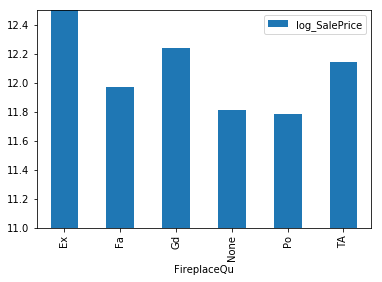

In [135]:
train.pivot_table(index='FireplaceQu', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.FireplaceQu.value_counts())
print(train.FireplaceQu.isnull().sum())
print(test.FireplaceQu.value_counts())
print(test.FireplaceQu.isnull().sum())

In [136]:
train = pd.concat([train, pd.get_dummies(train.FireplaceQu, drop_first = True)], axis=1)
train = train.drop('FireplaceQu', axis=1)
print(train.shape)

(1453, 168)


In [137]:
test = pd.concat([test, pd.get_dummies(test.FireplaceQu, drop_first = True)], axis=1)
test = test.drop('FireplaceQu', axis=1)
print(test.shape)

(1459, 166)


## GarageType

In [138]:
train['GarageType'] = train['GarageType'].fillna(value='None')
test['GarageType'] = test['GarageType'].fillna(value='None')

Attchd     866
Detchd     386
BuiltIn     87
None        81
Basment     19
CarPort      9
2Types       5
Name: GarageType, dtype: int64
0
Attchd     853
Detchd     392
BuiltIn     98
None        76
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64
0


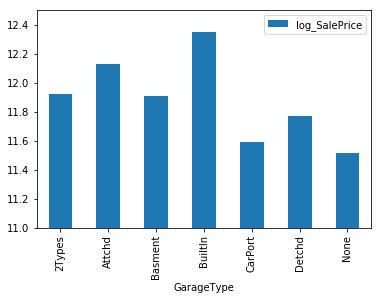

In [139]:
train.pivot_table(index='GarageType', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.GarageType.value_counts())
print(train.GarageType.isnull().sum())
print(test.GarageType.value_counts())
print(test.GarageType.isnull().sum())

In [140]:
train = pd.concat([train, pd.get_dummies(train.GarageType, drop_first = True)], axis=1)
train = train.drop('GarageType', axis=1)
print(train.shape)

(1453, 173)


In [141]:
test = pd.concat([test, pd.get_dummies(test.GarageType, drop_first = True)], axis=1)
test = test.drop('GarageType', axis=1)
print(test.shape)

(1459, 171)


## GarageFinish

In [142]:
train['GarageFinish'] = train['GarageFinish'].fillna(value='None')
test['GarageFinish'] = test['GarageFinish'].fillna(value='None')

Unf     605
RFn     418
Fin     349
None     81
Name: GarageFinish, dtype: int64
0
Unf     625
RFn     389
Fin     367
None     78
Name: GarageFinish, dtype: int64
0


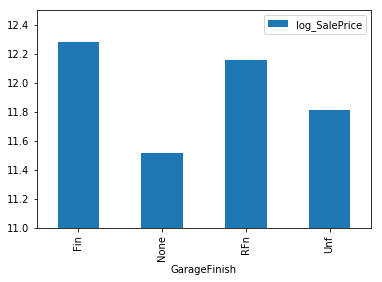

In [143]:
train.pivot_table(index='GarageFinish', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.GarageFinish.value_counts())
print(train.GarageFinish.isnull().sum())
print(test.GarageFinish.value_counts())
print(test.GarageFinish.isnull().sum())

In [144]:
train = pd.concat([train, pd.get_dummies(train.GarageFinish, drop_first = True)], axis=1)
train = train.drop('GarageFinish', axis=1)
print(train.shape)

(1453, 175)


In [145]:
test = pd.concat([test, pd.get_dummies(test.GarageFinish, drop_first = True)], axis=1)
test = test.drop('GarageFinish', axis=1)
print(test.shape)

(1459, 173)


## GarageQual

In [146]:
train['GarageQual'] = train['GarageQual'].fillna(value='None')
test['GarageQual'] = test['GarageQual'].fillna(value='None')

TA      1304
None      81
Fa        48
Gd        14
Po         3
Ex         3
Name: GarageQual, dtype: int64
0
TA      1293
None      78
Fa        76
Gd        10
Po         2
Name: GarageQual, dtype: int64
0


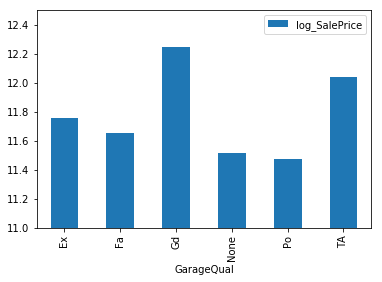

In [147]:
train.pivot_table(index='GarageQual', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.GarageQual.value_counts())
print(train.GarageQual.isnull().sum())
print(test.GarageQual.value_counts())
print(test.GarageQual.isnull().sum())

In [148]:
def f(x):
 return 'Gd' if x == 'Ex' else x
train['GarageQual'] = train['GarageQual'].apply(f)
print(train.GarageQual.value_counts()) 
print(train.shape)

TA      1304
None      81
Fa        48
Gd        17
Po         3
Name: GarageQual, dtype: int64
(1453, 175)


In [149]:
def g(x):
 return 'Gd' if x == 'Ex' else x
test['GarageQual'] = test['GarageQual'].apply(g)
print(test.GarageQual.value_counts()) 
print(test.shape)

TA      1293
None      78
Fa        76
Gd        10
Po         2
Name: GarageQual, dtype: int64
(1459, 173)


In [150]:
train = pd.concat([train, pd.get_dummies(train.GarageQual, drop_first = True)], axis=1)
train = train.drop('GarageQual', axis=1)
print(train.shape)

(1453, 178)


In [151]:
test = pd.concat([test, pd.get_dummies(test.GarageQual, drop_first = True)], axis=1)
test = test.drop('GarageQual', axis=1)
print(test.shape)

(1459, 176)


In [152]:
test.shape

(1459, 176)

## GarageCond

In [153]:
train = train.drop('GarageCond', axis = 1)
print(train.shape)

(1453, 177)


In [154]:
test = test.drop('GarageCond', axis = 1)
print(test.shape)

(1459, 175)


## PavedDrive

Y    1333
N      90
P      30
Name: PavedDrive, dtype: int64
0
Y    1301
N     126
P      32
Name: PavedDrive, dtype: int64
0


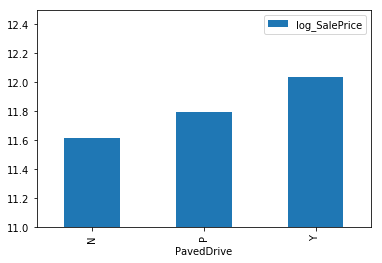

In [155]:
train.pivot_table(index='PavedDrive', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.PavedDrive.value_counts())
print(train.PavedDrive.isnull().sum())
print(test.PavedDrive.value_counts())
print(test.PavedDrive.isnull().sum())

In [156]:
train = pd.concat([train, pd.get_dummies(train.PavedDrive, drop_first = True)], axis=1)
train = train.drop('PavedDrive', axis=1)
print(train.shape)

(1453, 178)


In [157]:
test = pd.concat([test, pd.get_dummies(test.PavedDrive, drop_first = True)], axis=1)
test = test.drop('PavedDrive', axis=1)
print(test.shape)

(1459, 176)


## PoolQC

In [158]:
train = train.drop('PoolQC', axis = 1)
print(train.shape)

(1453, 177)


In [159]:
test = test.drop('PoolQC', axis = 1)
print(test.shape)

(1459, 175)


## Fence

In [160]:
train['Fence'] = train['Fence'].fillna(value='None')
test['Fence'] = test['Fence'].fillna(value='None')

None     1172
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64
0
None     1169
MnPrv     172
GdPrv      59
GdWo       58
MnWw        1
Name: Fence, dtype: int64
0


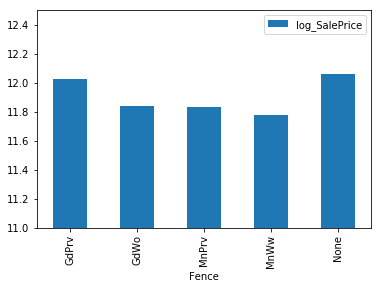

In [161]:
train.pivot_table(index='Fence', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.Fence.value_counts())
print(train.Fence.isnull().sum())
print(test.Fence.value_counts())
print(test.Fence.isnull().sum())

In [162]:
train = pd.concat([train, pd.get_dummies(train.Fence, drop_first = True)], axis=1)
train = train.drop('Fence', axis=1)
print(train.shape)

(1453, 180)


In [163]:
test = pd.concat([test, pd.get_dummies(test.Fence, drop_first = True)], axis=1)
test = test.drop('Fence', axis=1)
print(test.shape)

(1459, 178)


## MiscFeature

In [164]:
train = train.drop('MiscFeature', axis=1)
print(train.shape)

(1453, 179)


In [165]:
test = test.drop('MiscFeature', axis=1)
print(test.shape)

(1459, 177)


## SaleType

In [166]:
test['SaleType'] = test['SaleType'].fillna(value='WD')

WD       1264
New       119
COD        43
ConLD       8
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
0
WD       1259
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
Name: SaleType, dtype: int64
0


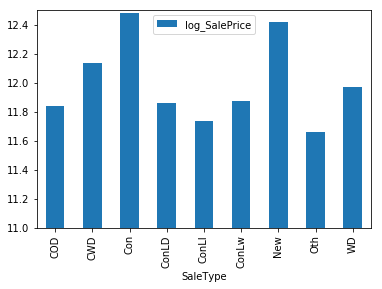

In [167]:
train.pivot_table(index='SaleType', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.SaleType.value_counts())
print(train.SaleType.isnull().sum())
print(test.SaleType.value_counts())
print(test.SaleType.isnull().sum())

In [168]:
train = pd.concat([train, pd.get_dummies(train.SaleType, drop_first = True)], axis=1)
train = train.drop('SaleType', axis=1)
print(train.shape)

(1453, 186)


In [169]:
test = pd.concat([test, pd.get_dummies(test.SaleType, drop_first = True)], axis=1)
test = test.drop('SaleType', axis=1)
print(test.shape)

(1459, 184)


## SaleCondition

Normal     1194
Partial     122
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
0
Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64
0


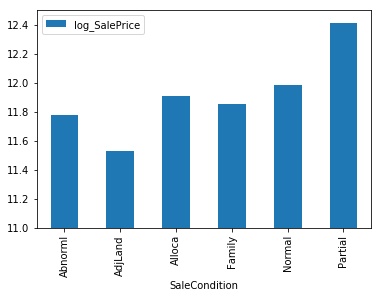

In [170]:
train.pivot_table(index='SaleCondition', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.SaleCondition.value_counts())
print(train.SaleCondition.isnull().sum())
print(test.SaleCondition.value_counts())
print(test.SaleCondition.isnull().sum())

In [171]:
train = pd.concat([train, pd.get_dummies(train.SaleCondition, drop_first = True)], axis=1)
train = train.drop('SaleCondition', axis=1)
print(train.shape)

(1453, 190)


In [172]:
test = pd.concat([test, pd.get_dummies(test.SaleCondition, drop_first = True)], axis=1)
test = test.drop('SaleCondition', axis=1)
print(test.shape)

(1459, 188)


## MoSold

6     252
7     234
5     204
4     141
8     120
3     105
10     88
11     78
9      63
12     59
1      57
2      52
Name: MoSold, dtype: int64
0
6     252
7     234
5     204
4     141
8     120
3     105
10     88
11     78
9      63
12     59
1      57
2      52
Name: MoSold, dtype: int64
0


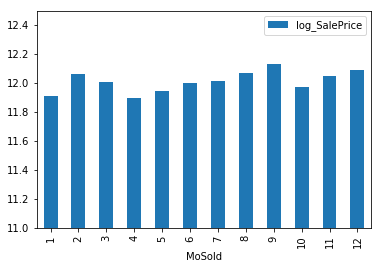

In [173]:
train.pivot_table(index='MoSold', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.MoSold.value_counts())
print(train.MoSold.isnull().sum())
print(train.MoSold.value_counts())
print(train.MoSold.isnull().sum())

In [174]:
train = pd.concat([train, pd.get_dummies(train.MoSold, drop_first = True)], axis=1)
train = train.drop('MoSold', axis=1)
print(train.shape)

(1453, 200)


In [175]:
test = pd.concat([test, pd.get_dummies(test.MoSold, drop_first = True)], axis=1)
test = test.drop('MoSold', axis=1)
print(test.shape)

(1459, 198)


## YrSold

2009    336
2007    327
2006    314
2008    301
2010    175
Name: YrSold, dtype: int64
0
2009    336
2007    327
2006    314
2008    301
2010    175
Name: YrSold, dtype: int64
0


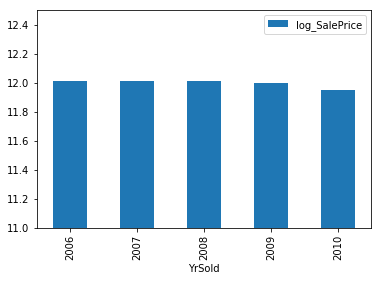

In [176]:
train.pivot_table(index='YrSold', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.YrSold.value_counts())
print(train.YrSold.isnull().sum())
print(train.YrSold.value_counts())
print(train.YrSold.isnull().sum())

In [177]:
train = pd.concat([train, pd.get_dummies(train.YrSold, drop_first = True)], axis=1)
train = train.drop('YrSold', axis=1)
print(train.shape)

(1453, 203)


In [178]:
test = pd.concat([test, pd.get_dummies(test.YrSold, drop_first = True)], axis=1)
test = test.drop('YrSold', axis=1)
print(test.shape)

(1459, 201)


## GarageCars

In [179]:
test['GarageCars'] = test['GarageCars'].fillna(value=2)

2    821
1    369
3    178
0     81
4      4
Name: GarageCars, dtype: int64
0
2.0    771
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64
0


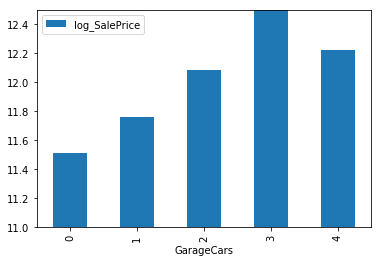

In [180]:
train.pivot_table(index='GarageCars', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(11,12.5))
print(train.GarageCars.value_counts())
print(train.GarageCars.isnull().sum())
print(test.GarageCars.value_counts())
print(test.GarageCars.isnull().sum())

In [181]:
def g(x):
 return 4 if x == 5 else x
test['GarageCars'] = test['GarageCars'].apply(g)
print(test.GarageCars.value_counts())   
print(test.shape)

2.0    771
1.0    407
3.0    193
0.0     76
4.0     12
Name: GarageCars, dtype: int64
(1459, 201)


In [182]:
train = pd.concat([train, pd.get_dummies(train.GarageCars, drop_first = True)], axis=1)
train = train.drop('GarageCars', axis=1)
print(train.shape)

(1453, 206)


In [183]:
test = pd.concat([test, pd.get_dummies(test.GarageCars, drop_first = True)], axis=1)
test = test.drop('GarageCars', axis=1)
print(test.shape)

(1459, 204)


## HalfBath

In [184]:
#numerical.. add to full bath
#train.pivot_table(index='HalfBath', 
                        # values = 'log_SalePrice', 
                        # aggfunc = np.median).plot(kind='bar',ylim=(10.5,13))
#print(train.HalfBath.value_counts())
#print(train.HalfBath.isnull().sum())

In [185]:
#train = pd.concat([train, pd.get_dummies(train.HalfBath, drop_first = True)], axis=1)
#train = train.drop('HalfBath', axis=1)
#print(train.shape)

In [186]:
#test = pd.concat([test, pd.get_dummies(test.HalfBath, drop_first = True)], axis=1)
#test = test.drop('HalfBath', axis=1)
#print(train.shape)

## OverallCond

5    817
6    252
7    204
8     72
4     55
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
0
5    824
6    279
7    185
8     72
4     44
3     25
9     19
1      6
2      5
Name: OverallCond, dtype: int64
0


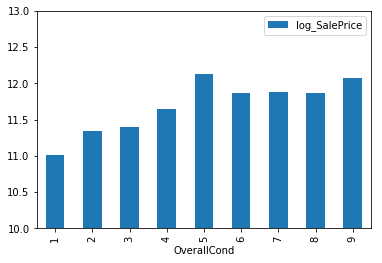

In [187]:
train.pivot_table(index='OverallCond', 
                         values = 'log_SalePrice', 
                         aggfunc = np.median).plot(kind='bar',ylim=(10,13))
print(train.OverallCond.value_counts())
print(train.OverallCond.isnull().sum())
print(test.OverallCond.value_counts())
print(test.OverallCond.isnull().sum())

In [188]:
train = pd.concat([train, pd.get_dummies(train.OverallCond, drop_first = True)], axis=1)
train = train.drop('OverallCond', axis=1)
print(train.shape)

(1453, 213)


In [189]:
test = pd.concat([test, pd.get_dummies(test.OverallCond, drop_first = True)], axis=1)
test = test.drop('OverallCond', axis=1)
print(test.shape)

(1459, 211)


In [190]:
null_vals = pd.DataFrame(test.isnull().sum().sort_values(ascending=False))
null_vals

,0
9,0
Sev,0
Veenker,0
Timber,0
StoneBr,0
Somerst,0
SawyerW,0
Sawyer,0
SWISU,0
OldTown,0


In [191]:
print(train.shape)
print(test.shape)
%store train
%store test

(1453, 213)
(1459, 211)
Stored 'train' (DataFrame)
Stored 'test' (DataFrame)
